<a href="https://colab.research.google.com/github/juli66257/ProyectoIntegrador1Semestre/blob/main/Code/data_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "drive/Shareddrives/MSc Ciencia Datos/proyectointegrador/notebooks"

!pip install import_ipynb
import import_ipynb
from AWS_S3_Interaction import get_buckets_from_S3, upload_file_to_S3
from AWS_S3_Interaction import delete_file_from_S3, download_from_S3

/content/drive/Shareddrives/MSc Ciencia Datos/proyectointegrador/notebooks
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
importing Jupyter notebook from AWS_S3_Interaction.ipynb
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 132 kB 4.4 MB/s 
     |████████████████████████████████| 79 kB 5.5 MB/s 
     |████████████████████████████████| 8.8 MB 46.7 MB/s 
     |████████████████████████████████| 138 kB 62.3 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.9 which is inco

# **Clasificador de morosidad**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

sns.set_context('notebook')

pd.options.display.max_columns = None
pd.options.display.max_rows= None

In [ ]:
from sklearn import preprocessing
from numpy import array
from numpy import argmax
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, auc, RocCurveDisplay, matthews_corrcoef
from sklearn.metrics import classification_report, plot_confusion_matrix, precision_score, recall_score, roc_curve
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV, RandomizedSearchCV
import pickle

In [ ]:
BUCKET_NAME = 'datalake-fraud-detection'

In [ ]:
download_from_S3(
    bucket = BUCKET_NAME,
    object_name = 'TRUSTED-zone/data_w_o_outliers.csv',
    file_path = '/content/drive/Shareddrives/MSc Ciencia Datos/proyectointegrador/data lake/data_w_o_outliers.csv'
)

True

In [ ]:
data_w_o_outliers = pd.read_csv("/content/drive/Shareddrives/MSc Ciencia Datos/proyectointegrador/data lake/data_w_o_outliers.csv")
data_w_o_outliers.drop(
    columns = 'Unnamed: 0',
    inplace = True
)
print(f'Shape del dataset: {data_w_o_outliers.shape}')
data_w_o_outliers.head()

Shape del dataset: (261196, 73)


,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,State servant,Working,Incomplete higher,Secondary / secondary special,Married,Separated,Single / not married,Municipal apartment,Office apartment,Rented apartment,With parents,Core staff,Drivers,High skill tech staff,Laborers,Managers,Medicine staff,Others,Sales staff,SIN OCUPACION,MONDAY,SATURDAY,SUNDAY,THURSDAY,TUESDAY,WEDNESDAY,FQ_ORGANIZATION_TYPE,EXT_SOURCE_3,TARGET,SK_ID_CURR
0,-0.577584,0.142334,-0.477952,-0.165929,-0.149306,1.506826,0.379922,0.579151,0.468649,-0.499074,1.599335,-0.245092,-0.062867,-0.631698,-0.123887,-0.231221,-0.205869,-0.29119,-0.547341,-0.467906,-1.315926,0.240461,4.156068,5.244035,-0.206953,-0.12386,-0.310759,-0.297586,-0.062456,-0.062692,-0.059471,-0.054228,-0.034768,-0.100175,-0.09053,-0.024411,-0.022537,-0.018311,-0.481594,-0.324261,1.38815,-0.717873,0.664535,-0.275514,0.967611,-0.2192,0.638147,-1.329851,-0.262095,2.401647,-0.19431,-0.09259,-0.126926,-0.225192,-0.313753,-0.253807,-0.196079,2.137703,-0.273086,-0.169043,-0.307487,-0.341494,-0.675609,-0.444376,-0.351737,-0.235701,-0.443783,-0.460926,2.218238,1.322739,-1.906718,1.0,100002.0
1,-0.577584,0.426982,1.726035,0.593311,-1.252967,-0.166808,1.078763,1.790876,0.468649,-0.499074,1.599335,-0.245092,-2.052397,-0.325497,-0.123887,-0.231221,-0.205869,-0.29119,-0.547341,-0.467906,0.564665,-0.175969,-0.321074,-0.276152,0.163149,-0.12386,-0.310759,-0.297586,-0.062456,-0.062692,-0.059471,-0.054228,-0.034768,-0.100175,-0.09053,-0.024411,-0.022537,-0.018311,-1.016479,-0.324261,-0.72030,-0.717873,-1.504812,3.629586,-1.033473,-0.2192,-1.567038,0.751964,-0.262095,-0.416381,-0.19431,-0.09259,-0.126926,-0.225192,3.187218,-0.253807,-0.196079,-0.467792,-0.273086,-0.169043,-0.307487,-0.341494,-0.675609,2.250346,-0.351737,-0.235701,-0.443783,-0.460926,-0.450808,-0.923397,0.180453,0.0,100003.0
2,-0.577584,-0.426962,-1.152880,-1.405130,-0.783513,-0.689475,0.206205,0.306861,0.468649,2.003709,1.599335,-0.245092,-0.062867,-0.937900,-0.123887,-0.231221,-0.205869,-0.29119,-0.547341,-0.467906,0.217469,-0.592400,-0.321074,-0.276152,0.178872,-0.12386,-0.310759,-0.297586,-0.062456,-0.062692,-0.059471,-0.054228,-0.034768,-0.100175,-0.09053,-0.024411,-0.022537,-0.018311,-1.016479,3.083938,1.38815,1.393005,0.664535,-0.275514,0.967611,-0.2192,0.638147,-1.329851,-0.262095,2.401647,-0.19431,-0.09259,-0.126926,-0.225192,-0.313753,-0.253807,-0.196079,2.137703,-0.273086,-0.169043,-0.307487,-0.341494,-0.675609,2.250346,-0.351737,-0.235701,-0.443783,-0.460926,-0.450808,-0.865855,1.122514,0.0,100004.0
3,-0.577584,-0.142314,-0.711333,0.178277,-0.929101,-0.680081,-1.375696,0.369137,0.468649,-0.499074,-0.625260,-0.245092,-0.062867,1.511712,-0.123887,-0.231221,-0.205869,-0.29119,-0.547341,-0.467906,0.712245,0.240461,-0.321074,-0.276152,0.418349,-0.12386,-0.310759,-0.297586,-0.062456,-0.062692,-0.059471,-0.054228,-0.034768,-0.100175,-0.09053,-0.024411,-0.022537,-0.018311,-0.695548,-0.324261,-0.72030,-0.717873,0.664535,-0.275514,0.967611,-0.2192,0.638147,-1.329851,-0.262095,-0.416381,-0.19431,-0.09259,-0.126926,-0.225192,-0.313753,-0.253807,-0.196079,2.137703,-0.273086,-0.169043,-0.307487,-0.341494,-0.675609,-0.444376,-0.351737,-0.235701,-0.443783,-0.460926,2.218238,1.322739,0.180453,0.0,100006.0
4,-0.577584

In [ ]:
data_w_o_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261196 entries, 0 to 261195
Data columns (total 73 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CNT_CHILDREN                   261196 non-null  float64
 1   AMT_INCOME_TOTAL               261196 non-null  float64
 2   AMT_CREDIT                     261196 non-null  float64
 3   AMT_ANNUITY                    261196 non-null  float64
 4   REGION_POPULATION_RELATIVE     261196 non-null  float64
 5   DAYS_BIRTH                     261196 non-null  float64
 6   DAYS_REGISTRATION              261196 non-null  float64
 7   DAYS_ID_PUBLISH                261196 non-null  float64
 8   FLAG_EMP_PHONE                 261196 non-null  float64
 9   FLAG_WORK_PHONE                261196 non-null  float64
 10  FLAG_PHONE                     261196 non-null  float64
 11  FLAG_EMAIL                     261196 non-null  float64
 12  REGION_RATING_CLIENT_W_CITY   

## **Reducción de dimensionalidad:**

In [ ]:
X = data_w_o_outliers.drop(columns = ['TARGET', 'SK_ID_CURR'])
y = data_w_o_outliers['TARGET']

pca_model = PCA()
pca_model.fit(X)

X_pca = pca_model.transform(X)

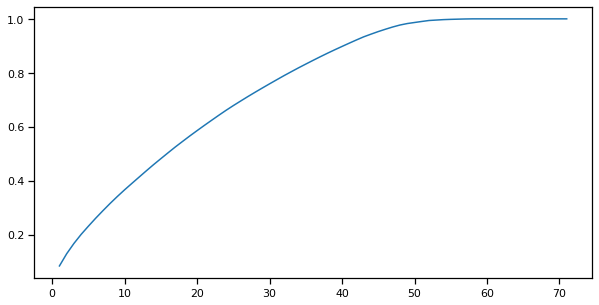

In [ ]:
explained_variance = []

for i, var in enumerate(pca_model.explained_variance_ratio_):
    
    if i == 0:
        explained_variance.append(var)
    else:
        explained_variance.append(explained_variance[i - 1] + var)

plt.figure(figsize = (10, 5))
plt.plot(range(1, len(explained_variance)+1), explained_variance)
plt.savefig('/content/drive/Shareddrives/MSc Ciencia Datos/proyectointegrador/Images/pca_explained_variance.png')
plt.show()

In [ ]:
index_pca_significant = max(np.where(np.array(explained_variance) <= 0.9)[0])
index_pca_significant

39

In [ ]:
loadings = pca_model.components_

loadings = pca_model.components_
num_pc = pca_model.n_features_
pc_list = ["Z"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = X.columns.values
loadings_df = loadings_df.set_index('variable')


loadings_df.head()

,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,Z10,Z11,Z12,Z13,Z14,Z15,Z16,Z17,Z18,Z19,Z20,Z21,Z22,Z23,Z24,Z25,Z26,Z27,Z28,Z29,Z30,Z31,Z32,Z33,Z34,Z35,Z36,Z37,Z38,Z39,Z40,Z41,Z42,Z43,Z44,Z45,Z46,Z47,Z48,Z49,Z50,Z51,Z52,Z53,Z54,Z55,Z56,Z57,Z58,Z59,Z60,Z61,Z62,Z63,Z64,Z65,Z66,Z67,Z68,Z69,Z70,Z71
variable,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CNT_CHILDREN,-0.167039,0.019489,0.001598,-0.193978,-0.023573,-0.001032,-0.088177,0.143745,-0.173727,-0.016694,-0.006704,0.015804,0.010221,0.095308,0.014893,-0.030287,-0.087306,0.005116,0.397037,-0.003183,0.051362,-0.031910,0.090216,-0.275782,-0.117517,0.096904,-0.008051,-0.004392,0.033828,-0.097445,0.130530,0.101376,0.019040,0.470890,-0.241870,0.023307,0.149059,-0.208046,-0.035761,0.009851,-0.029691,-0.266116,-0.027844,-0.033266,0.045300,-0.149254,-0.003494,0.317935,-0.028107,-0.006930,0.040811,0.008293,-0.000683,0.000987,0.004115,-0.000560,0.002144,-0.001350,0.000023,0.000058,1.719137e-16,0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00
AMT_INCOME_TOTAL,-0.028060,0.113434,-0.004696,0.026124,-0.035426,0.033716,0.052912,-0.007964,0.006624,-0.022086,0.001716,-0.000124,0.000245,0.002437,0.011812,-0.015550,0.024881,0.012304,-0.000124,-0.002568,0.011004,-0.008277,0.026783,0.022010,-0.009206,0.010149,-0.028213,0.004646,-0.003304,-0.042807,0.004342,-0.001423,-0.012409,-0.013294,-0.001951,-0.017764,0.000586,0.008020,-0.000935,0.023519,-0.011754,-0.013112,0.012251,-0.023876,-0.017613,-0.006082,0.023974,0.007468,0.037747,0.006556,0.084805,0.096987,0.968671,-0.117939,-0.007047,-0.027228,0.007552,-0.001156,0.000356,0.000094,-7.063978e-17,-6.007619e-17,1.050003e-16,-3.791434e-17,2.942855e-17,1.462802e-16,3.828951e-17,2.949607e-17,-1.717376e-16,-8.500145e-17,-3.209238e-17
AMT_CREDIT,-0.027905,0.411793,-0.003270,-0.105003,0.094967,0.063198,0.367859,-0.221427,0.051377,0.011738,-0.006744,-0.006646,0.017207,0.067748,-0.081307,0.025684,0.009336,0.029320,-0.031329,-0.064702,-0.062370,0.054405,-0.006277,-0.080631,0.039314,-0.054998,-0.101021,-0.068969,-0.084972,-0.215742,0.056496,-0.013697,-0.047140,-0.015525,-0.001402,-0.016915,-0.016774,-0.010261,-0.037270,0.091901,-0.078940,-0.076607,0.102165,-0.004020,0.068902,0.007378,-0.034840,0.033991,0.013441,-0.008132,-0.041521,-0.682123,-0.008224,0.001864,0.000715,-0.001486,0.002622,-0.001314,-0.000093,-0.000111,-3.329579e-17,9.352446e-17,-7.968039e-17,1.203413e-16,1.100677e-16,-1.559299e-16,-7.314961e-17,4.932043e-17,3.014669e-17,-2.396125e-17,-3.023500e-17
AMT_ANNUITY,-0.053720,0.411091,0.012265,-0.079953,0.043413,0.071545,0.371973,-0.203826,0.033003,0.002869,-0.005261,-0.010466,0.014138,0.059840,-0.078493,0.028918,0.013583,0.034500,-0.022845,-0.037156,-0.006034,0.027919,-0.008727,-0.074969,0.011296,-0.029957,-0.092192,-0.050287,-0.071394,-0.166265,0.071769,-0.009531,-0.008760,-0.001604,0.014427,-0.021023,-0.002003,-0.020816,-0.016020,0.069123,-0.060287,-0.051705,0.104560,-0.030159,0.040725,0.006821,0.004750,-0.044335,0.022960,0.006324,-0.023458,0.714590,-0.150669,0.017798,0.000656,-0.002063,0.000577,0.000908,0.000042,0.000069,9.050393e-17,8.072937e-17,-6.526220e-17,4.848623e-17,6.154778e-17,4.024323e-17,-9.638081e-17,8.879380e-17,4.957160e-17,8.273185e-17,-3.598746e-17
REGION_POPULATION_RELATIVE,0.018022,0.230836,-0.094513,0.333244,0.037063,-0.108352,-0.028411,0.209784,-0.068097,-0.043749,-0.005268,-0.005344,-0.010545,0.025132,-0.071012,0.150594,-0.038972,0.016408,0.007032,-0.082822,0.217249,-0.011799,0.021441,-0.102778,-0.120222,0.032542,0.117411,0.118912,0.171500,-0.162848,0.019070,0.173674,0.010718,-0.140305,-0.009603,0.151157,-0.224208,0.053419,0.135195,-0.052554,0.071598,-0.048722,-0.037840,0.055827,-0.077886,-0.147905,-0.614552,-0.009646,-0.005988,0.000760,-0.040714,0.002247,-0.009473,0.000691,0.000854,-0.000703,-0.000223,-0.000163,0.000068,-0.000039,-3.282413e-17,7.192932e-17,8.167002e-17,3.683764e-18,-1.232842e-17,-1.454860e-17,-6.984593e-17,2.625680e-17,-6.9

#### Definición de X_ (Datos transformados usando PCA)

In [ ]:
X_ = X_pca[:, :40]
X_.shape

(261196, 40)

## **Primer Clasificador:**

### Árbol de decisiones - profundidad 10 - Usando todo el data set (Desbalanceado)

In [ ]:
tree_classifier = DecisionTreeClassifier(max_depth = 10, random_state = 0)
tree_classifier.fit(X_, y)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [ ]:
y_pred = tree_classifier.predict(X_)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96    240314
         1.0       0.79      0.07      0.14     20882

    accuracy                           0.92    261196
   macro avg       0.86      0.54      0.55    261196
weighted avg       0.91      0.92      0.89    261196



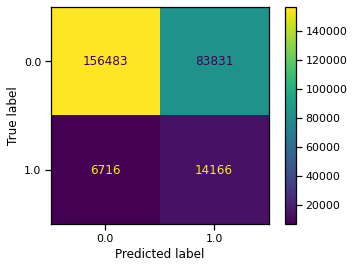

In [ ]:
plot_confusion_matrix(tree_classifier, X_, y)
plt.savefig('/content/drive/Shareddrives/MSc Ciencia Datos/proyectointegrador/Images/confMat_DecTr_AllData.png')
plt.show()

### Árbol de decisiones - profundidad 10 - Balanceando el target aleatoriamente - un sólo slice

In [ ]:
full_idx_0 = data_w_o_outliers[data_w_o_outliers['TARGET'] == 0].index
size_1 =len(data_w_o_outliers[data_w_o_outliers['TARGET'] == 1])

idx_0 = np.random.choice(full_idx_0, size = size_1)
X_0 = X_[idx_0, :]
y_0 = y[idx_0]

X_0.shape, y_0.shape

((20882, 40), (20882,))

In [ ]:
full_idx_1 = data_w_o_outliers[data_w_o_outliers['TARGET'] == 1].index
size_1 =len(data_w_o_outliers[data_w_o_outliers['TARGET'] == 1])

idx_1 = np.random.choice(full_idx_1, size = size_1)
X_1 = X_[idx_1, :]
y_1 = y[idx_1]

X_1.shape, y_1.shape

((20882, 40), (20882,))

In [ ]:
X_b = np.append(X_0, X_1, axis = 0)
y_b = np.append(y_0, y_1, axis = 0)

X_b.shape, y_b.shape

((41764, 40), (41764,))

In [ ]:
tree_classifier = DecisionTreeClassifier(max_depth = 10, random_state = 0)
tree_classifier.fit(X_b, y_b)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [ ]:
y_pred_b = tree_classifier.predict(X_b)
print(classification_report(y_b, y_pred_b))

              precision    recall  f1-score   support

         0.0       0.78      0.73      0.76     20882
         1.0       0.75      0.80      0.77     20882

    accuracy                           0.77     41764
   macro avg       0.77      0.77      0.76     41764
weighted avg       0.77      0.77      0.76     41764



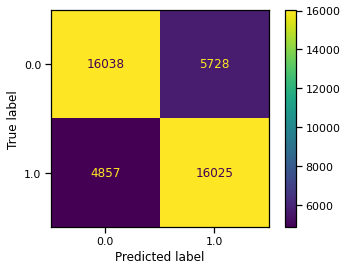

In [ ]:
plot_confusion_matrix(tree_classifier, X_b, y_b)
plt.savefig('/content/drive/Shareddrives/MSc Ciencia Datos/proyectointegrador/Images/confMat_DecTr_balanced_random.png')
plt.show()

### Árbol de decisiones - profundidad 10 - Usando todo el data set (Desbalanceado) - Split Train and Test

#### Función para evaluar vía cross validation:

In [ ]:
def metrics_CV_classifier(model, X, y, cv = 5):
    
    #  Aplicando cross validation k-folds, con 5 pliegues
    scores = cross_validate(
        estimator = model,
        X = X,
        y = y,
        cv = cv,
        scoring = [
            'accuracy',
            'f1',
            'precision',
            'recall'
        ],
        return_train_score = True,
        n_jobs = -1,
        return_estimator = True
    )

    #  Para visualizar mejor el resultado de la validación cruzada, se da estructura de Data Frame
    df_tree_p1_scores = pd.DataFrame(scores)

    print(f'F1 score medio en Train: {df_tree_p1_scores.train_f1.mean():.2f}')
    print(f'F1 score medio en Test: {df_tree_p1_scores.test_f1.mean():.2f}')
    print(f'Precision obtenido en train: {df_tree_p1_scores.train_precision.mean():.2f}')
    print(f'Precision obtenido en test: {df_tree_p1_scores.test_precision.mean():.2f}')

    display(df_tree_p1_scores.T)

    return scores

In [ ]:
tree_classifier = DecisionTreeClassifier(max_depth = 10, random_state = 0)

In [ ]:
cv_scores = metrics_CV_classifier(tree_classifier, X_b, y_b, 5)

F1 score medio en Train: 0.77
F1 score medio en Test: 0.68
Precision obtenido en train: 0.77
Precision obtenido en test: 0.67


,0,1,2,3,4
fit_time,2.466684,2.48624,2.54681,2.563574,1.815074
score_time,0.029469,0.0296,0.030608,0.030819,0.018301
estimator,"DecisionTreeClassifier(max_depth=10, random_st...","DecisionTreeClassifier(max_depth=10, random_st...","DecisionTreeClassifier(max_depth=10, random_st...","DecisionTreeClassifier(max_depth=10, random_st...","DecisionTreeClassifier(max_depth=10, random_st..."
test_accuracy,0.667904,0.676643,0.666108,0.679516,0.67433
train_accuracy,0.769896,0.773009,0.777169,0.776032,0.772926
test_f1,0.67357,0.683316,0.666985,0.679823,0.679245
train_f1,0.773643,0.775182,0.776366,0.774629,0.774217
test_precision,0.662193,0.669423,0.665317,0.679254,0.669145
train_precision,0.76127,0.767853,0.779151,0.779488,0.769841
test_recall,0.685345,0.697797,0.668662,0.680393,0.689655


In [ ]:
y_b_pred = cv_scores['estimator'][1].predict(X_b)

print(classification_report(y_b, y_pred_b))

              precision    recall  f1-score   support

         0.0       0.78      0.73      0.76     20882
         1.0       0.75      0.80      0.77     20882

    accuracy                           0.77     41764
   macro avg       0.77      0.77      0.76     41764
weighted avg       0.77      0.77      0.76     41764



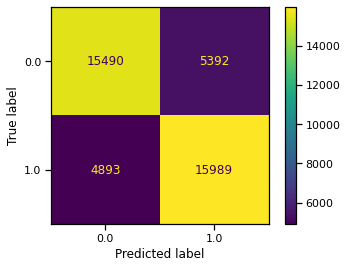

In [ ]:
plot_confusion_matrix(cv_scores['estimator'][1], X_b, y_b)
plt.show()

### Árbol de decisiones - profundidad 10 - Usando n primeros datos

In [ ]:
idx_0_nfirst = full_idx_0[:size_1]
X_0_first = X_[idx_0_nfirst, :]
y_0_first = y[idx_0_nfirst]

X_0_first.shape, y_0_first.shape

((20882, 40), (20882,))

In [ ]:
X_b_first = np.append(X_0_first, X_1, axis = 0)
y_b_first = np.append(y_0_first, y_1, axis = 0)

X_b_first.shape, y_b_first.shape

((41764, 40), (41764,))

In [ ]:
tree_classifier_n_first = DecisionTreeClassifier(max_depth = 10, random_state = 0)
cv_scores = metrics_CV_classifier(tree_classifier_n_first, X_b_first, y_b_first, 5)

F1 score medio en Train: 0.78
F1 score medio en Test: 0.68
Precision obtenido en train: 0.77
Precision obtenido en test: 0.66


,0,1,2,3,4
fit_time,2.529915,2.468502,2.644969,2.541056,1.806102
score_time,0.029297,0.027784,0.028873,0.030447,0.018159
estimator,"DecisionTreeClassifier(max_depth=10, random_st...","DecisionTreeClassifier(max_depth=10, random_st...","DecisionTreeClassifier(max_depth=10, random_st...","DecisionTreeClassifier(max_depth=10, random_st...","DecisionTreeClassifier(max_depth=10, random_st..."
test_accuracy,0.658207,0.674249,0.666587,0.672573,0.677323
train_accuracy,0.775254,0.774924,0.777319,0.778935,0.780887
test_f1,0.669828,0.675415,0.670141,0.675909,0.686373
train_f1,0.779231,0.776377,0.777618,0.779378,0.783229
test_precision,0.64773,0.672926,0.66315,0.669169,0.667648
train_precision,0.765702,0.771422,0.776551,0.777798,0.774946
test_recall,0.693487,0.677921,0.67728,0.682787,0.706178


In [ ]:
y_b_pred = cv_scores['estimator'][4].predict(X_b_first)
print(classification_report(y_b_first, y_pred_b))

              precision    recall  f1-score   support

         0.0       0.78      0.73      0.76     20882
         1.0       0.75      0.80      0.77     20882

    accuracy                           0.77     41764
   macro avg       0.77      0.77      0.76     41764
weighted avg       0.77      0.77      0.76     41764



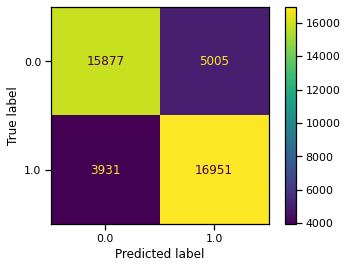

In [ ]:
plot_confusion_matrix(cv_scores['estimator'][4], X_b_first, y_b_first)
plt.savefig('/content/drive/Shareddrives/MSc Ciencia Datos/proyectointegrador/Images/matConf_DecTr_balanced_first.png')
plt.show()

### Chequeando sensibilidad con la profundidad:

In [ ]:
max_depth = 40
precision_1_scores_train = []
recall_1_scores_train = []
precision_1_scores_test = []
recall_1_scores_test = []

idx_0 = np.random.choice(full_idx_0, size = size_1)
X_0 = X_[idx_0, :]
y_0 = y[idx_0]

X_b = np.append(X_0, X_1, axis = 0)
y_b = np.append(y_0, y_1, axis = 0)

for depth in range(2, max_depth + 1):

    tree_classifier = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    X_train, X_test, y_train, y_test = train_test_split(
        X_b, y_b, test_size = 0.25, random_state = 0
    )
    tree_classifier.fit(X_train, y_train)
    y_train_pred = tree_classifier.predict(X_train)
    y_test_pred = tree_classifier.predict(X_test)

    recall_train = recall_score(y_train, y_train_pred, average = 'binary', pos_label = 1)
    recall_test = recall_score(y_test, y_test_pred, average = 'binary', pos_label = 1)
    recall_1_scores_train.append(recall_train)
    recall_1_scores_test.append(recall_test)

    precision_train = precision_score(y_train, y_train_pred, average = 'binary', pos_label = 1)
    precision_test = precision_score(y_test, y_test_pred, average = 'binary', pos_label = 1)
    precision_1_scores_train.append(precision_train)
    precision_1_scores_test.append(precision_test)


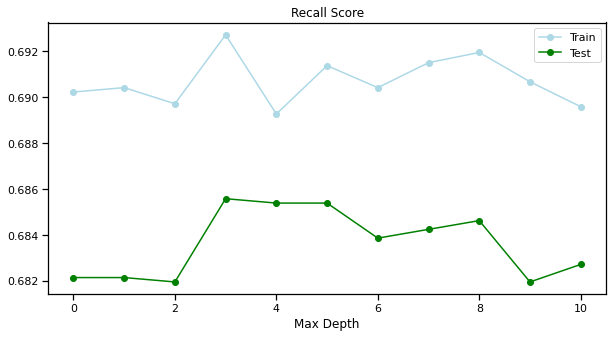

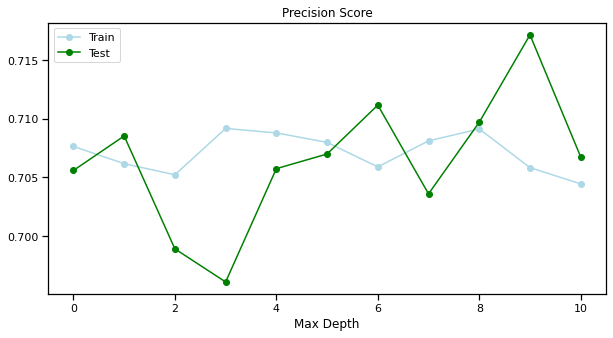

In [ ]:
plt.figure(figsize = (10, 5))
plt.plot(recall_1_scores_train, marker = 'o', color = 'lightblue', label = 'Train')
plt.plot(recall_1_scores_test, marker = 'o', color = 'green', label = 'Test')
plt.title('Recall Score')
plt.xlabel('Max Depth')
plt.legend()
plt.savefig('/content/drive/Shareddrives/MSc Ciencia Datos/proyectointegrador/Images/Recall_DecTr_depth.png')
plt.show()

plt.figure(figsize = (10, 5))
plt.plot(precision_1_scores_train, marker = 'o', color = 'lightblue', label = 'Train')
plt.plot(precision_1_scores_test, marker = 'o', color = 'green', label = 'Test')
plt.title('Precision Score')
plt.xlabel('Max Depth')
plt.legend()
plt.savefig('/content/drive/Shareddrives/MSc Ciencia Datos/proyectointegrador/Images/Precision_DecTr_depth.png')
plt.show()

### Macro Cross Validation

In [ ]:
count_folds = data_w_o_outliers['TARGET'].value_counts()[0] / data_w_o_outliers['TARGET'].value_counts()[1]
count_folds

11.508188870797817

In [ ]:
full_idx_0 = data_w_o_outliers[data_w_o_outliers['TARGET'] == 0].index
size_fold = int(len(data_w_o_outliers) / 12)
precision_1_scores_train = []
recall_1_scores_train = []
precision_1_scores_test = []
recall_1_scores_test = []

for fold in range(11):
    idx_0 = np.random.choice(np.array(full_idx_0), size = size_fold, replace = False)
    full_idx_0 = np.array(
        [x for x in full_idx_0 if x not in idx_0]
    )

    X_0 = X_[idx_0, :]
    y_0 = y[idx_0]

    X_b = np.append(X_0, X_1, axis = 0)
    y_b = np.append(y_0, y_1, axis = 0)

    tree_classifier = DecisionTreeClassifier(max_depth = 10, random_state = 0)
    X_train, X_test, y_train, y_test = train_test_split(
        X_b, y_b, test_size = 0.25, random_state = 0
    )
    tree_classifier.fit(X_train, y_train)
    y_train_pred = tree_classifier.predict(X_train)
    y_test_pred = tree_classifier.predict(X_test)

    recall_train = recall_score(y_train, y_train_pred, average = 'binary', pos_label = 1)
    recall_test = recall_score(y_test, y_test_pred, average = 'binary', pos_label = 1)
    recall_1_scores_train.append(recall_train)
    recall_1_scores_test.append(recall_test)

    precision_train = precision_score(y_train, y_train_pred, average = 'binary', pos_label = 1)
    precision_test = precision_score(y_test, y_test_pred, average = 'binary', pos_label = 1)
    precision_1_scores_train.append(precision_train)
    precision_1_scores_test.append(precision_test)

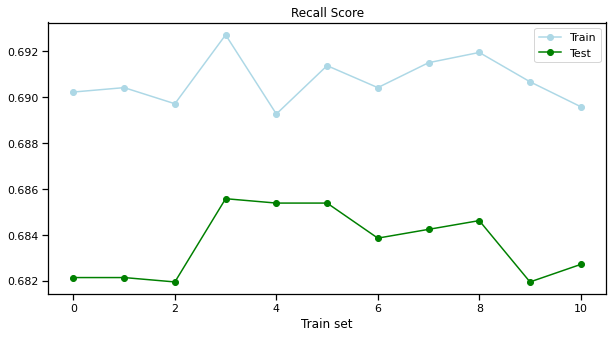

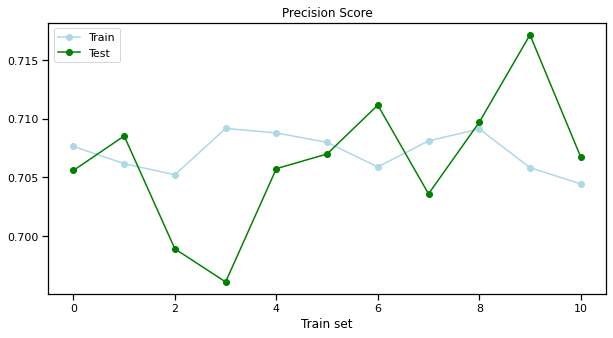

In [ ]:
plt.figure(figsize = (10, 5))
plt.plot(recall_1_scores_train, marker = 'o', color = 'lightblue', label = 'Train')
plt.plot(recall_1_scores_test, marker = 'o', color = 'green', label = 'Test')
plt.title('Recall Score')
plt.xlabel('Train set')
plt.legend()
plt.savefig('/content/drive/Shareddrives/MSc Ciencia Datos/proyectointegrador/Images/Recall_DecTr_dataselection.png')
plt.show()

plt.figure(figsize = (10, 5))
plt.plot(precision_1_scores_train, marker = 'o', color = 'lightblue', label = 'Train')
plt.plot(precision_1_scores_test, marker = 'o', color = 'green', label = 'Test')
plt.title('Precision Score')
plt.xlabel('Train set')
plt.legend()
plt.savefig('/content/drive/Shareddrives/MSc Ciencia Datos/proyectointegrador/Images/Precision_DecTr_dataselection.png')
plt.show()

## **Segundo Clasificador:**

### Regresión logistica - Usando todo el data set (Desbalanceado)

In [ ]:
## Regresion logistica

In [ ]:
clf = LogisticRegression(random_state=0).fit(X_, y)

In [ ]:
clf.score(X_, y)

0.9197537481431569

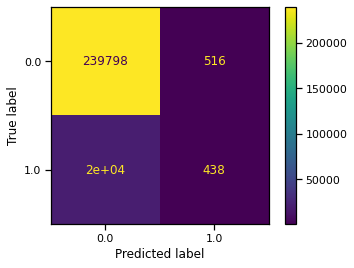

In [ ]:
plot_confusion_matrix(clf, X_, y)
plt.savefig('/content/drive/Shareddrives/MSc Ciencia Datos/proyectointegrador/Images/matConf_RegLog_AllData.png')
plt.show()

In [ ]:
print(classification_report(y, clf.predict(X_)))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96    240314
         1.0       0.46      0.02      0.04     20882

    accuracy                           0.92    261196
   macro avg       0.69      0.51      0.50    261196
weighted avg       0.88      0.92      0.88    261196



### Regresion Logistica Balanceando el target aleatoriamente - un sólo slice

In [ ]:
clf_b = LogisticRegression(random_state=0).fit(X_b, y_b)

In [ ]:
clf_b.score(X_b, y_b)

0.706176139561058

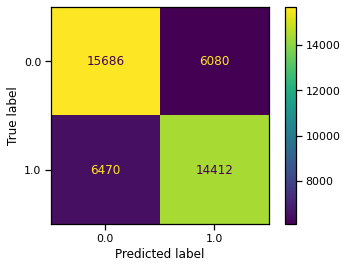

In [ ]:
plot_confusion_matrix(clf_b,X_b, y_b)
plt.savefig('/content/drive/Shareddrives/MSc Ciencia Datos/proyectointegrador/Images/matConf_RegLog_balanced_random.png')
plt.show()

In [ ]:
print(classification_report(y_b, clf_b.predict(X_b)))

              precision    recall  f1-score   support

         0.0       0.71      0.72      0.71     21766
         1.0       0.70      0.69      0.70     20882

    accuracy                           0.71     42648
   macro avg       0.71      0.71      0.71     42648
weighted avg       0.71      0.71      0.71     42648



In [ ]:
reglog_n_random = LogisticRegression(random_state = 0)
cv_scores = metrics_CV_classifier(reglog_n_random, X_b_first, y_b_first, 5)

F1 score medio en Train: 0.71
F1 score medio en Test: 0.71
Precision obtenido en train: 0.71
Precision obtenido en test: 0.71


,0,1,2,3,4
fit_time,0.163061,0.17234,0.172289,0.148024,0.10496
score_time,0.0284,0.027116,0.026685,0.027771,0.016476
estimator,LogisticRegression(random_state=0),LogisticRegression(random_state=0),LogisticRegression(random_state=0),LogisticRegression(random_state=0),LogisticRegression(random_state=0)
test_accuracy,0.702143,0.715072,0.699749,0.713995,0.715517
train_accuracy,0.709946,0.708958,0.71225,0.707911,0.708608
test_f1,0.699734,0.714354,0.701286,0.710319,0.714217
train_f1,0.70862,0.707848,0.710788,0.706364,0.707382
test_precision,0.705353,0.716073,0.697796,0.719656,0.717496
train_precision,0.711895,0.71058,0.714398,0.710103,0.710371
test_recall,0.694205,0.712644,0.704812,0.701221,0.710967


In [ ]:
full_idx_0 = data_w_o_outliers[data_w_o_outliers['TARGET'] == 0].index
size_fold = int(len(data_w_o_outliers) / 12)
precision_1_scores_train = []
recall_1_scores_train = []
precision_1_scores_test = []
recall_1_scores_test = []

for fold in range(11):
    idx_0 = np.random.choice(np.array(full_idx_0), size = size_fold, replace = False)
    full_idx_0 = np.array(
        [x for x in full_idx_0 if x not in idx_0]
    )

    X_0 = X_[idx_0, :]
    y_0 = y[idx_0]

    X_b = np.append(X_0, X_1, axis = 0)
    y_b = np.append(y_0, y_1, axis = 0)

    reg_logist_clf = LogisticRegression(random_state = 0)
    X_train, X_test, y_train, y_test = train_test_split(
        X_b, y_b, test_size = 0.25, random_state = 0
    )
    reg_logist_clf.fit(X_train, y_train)
    y_train_pred = reg_logist_clf.predict(X_train)
    y_test_pred = reg_logist_clf.predict(X_test)

    recall_train = recall_score(y_train, y_train_pred, average = 'binary', pos_label = 1)
    recall_test = recall_score(y_test, y_test_pred, average = 'binary', pos_label = 1)
    recall_1_scores_train.append(recall_train)
    recall_1_scores_test.append(recall_test)

    precision_train = precision_score(y_train, y_train_pred, average = 'binary', pos_label = 1)
    precision_test = precision_score(y_test, y_test_pred, average = 'binary', pos_label = 1)
    precision_1_scores_train.append(precision_train)
    precision_1_scores_test.append(precision_test)

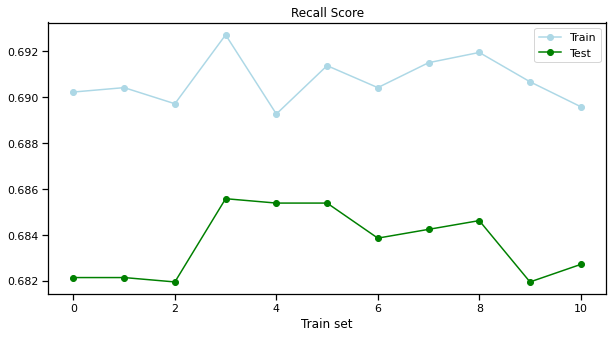

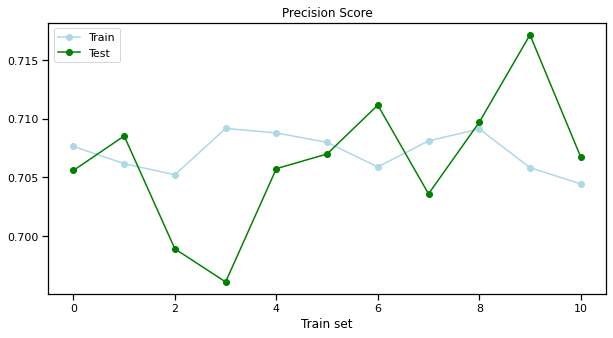

In [ ]:
plt.figure(figsize = (10, 5))
plt.plot(recall_1_scores_train, marker = 'o', color = 'lightblue', label = 'Train')
plt.plot(recall_1_scores_test, marker = 'o', color = 'green', label = 'Test')
plt.title('Recall Score')
plt.xlabel('Train set')
plt.legend()
plt.savefig('/content/drive/Shareddrives/MSc Ciencia Datos/proyectointegrador/Images/Recall_LogReg_dataselection.png')
plt.show()

plt.figure(figsize = (10, 5))
plt.plot(precision_1_scores_train, marker = 'o', color = 'lightblue', label = 'Train')
plt.plot(precision_1_scores_test, marker = 'o', color = 'green', label = 'Test')
plt.title('Precision Score')
plt.xlabel('Train set')
plt.legend()
plt.savefig('/content/drive/Shareddrives/MSc Ciencia Datos/proyectointegrador/Images/Precision_LogReg_dataselection.png')
plt.show()

## **Tercer clasificador:** Random Forest

In [ ]:
random_forest_clf_b = RandomForestClassifier(
    n_estimators = 25,
    max_depth = 10,
    random_state=0
)
random_forest_clf_b.fit(X_b, y_b)

RandomForestClassifier(max_depth=10, n_estimators=25, random_state=0)

In [ ]:
random_forest_clf_b.score(X_b, y_b)

0.8357953479647345

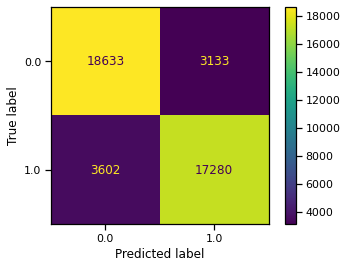

In [ ]:
plot_confusion_matrix(random_forest_clf_b, X_b, y_b)
plt.savefig('/content/drive/Shareddrives/MSc Ciencia Datos/proyectointegrador/Images/matConf_rndForest_balanced_random.png')
plt.show()

In [ ]:
print(classification_report(y_b, random_forest_clf_b.predict(X_b)))

              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84     21766
         1.0       0.84      0.82      0.83     20882

    accuracy                           0.84     42648
   macro avg       0.84      0.84      0.84     42648
weighted avg       0.84      0.84      0.84     42648



In [ ]:
cv_scores = metrics_CV_classifier(model = random_forest_clf_b, X = X_b, y = y_b, cv = 5)

F1 score medio en Train: 0.84
F1 score medio en Test: 0.72
Precision obtenido en train: 0.85
Precision obtenido en test: 0.73


,0,1,2,3,4
fit_time,6.683261,6.66662,6.380103,6.285881,4.756879
score_time,0.075105,0.075366,0.077082,0.076662,0.054921
estimator,"(DecisionTreeClassifier(max_depth=10, max_feat...","(DecisionTreeClassifier(max_depth=10, max_feat...","(DecisionTreeClassifier(max_depth=10, max_feat...","(DecisionTreeClassifier(max_depth=10, max_feat...","(DecisionTreeClassifier(max_depth=10, max_feat..."
test_accuracy,0.721805,0.729074,0.725674,0.731973,0.733966
train_accuracy,0.844129,0.843162,0.84539,0.842111,0.84173
test_f1,0.712468,0.720522,0.716844,0.72311,0.727447
train_f1,0.837896,0.837113,0.840446,0.836614,0.836185
test_precision,0.721118,0.728006,0.724737,0.731618,0.729814
train_precision,0.853665,0.851604,0.849413,0.847956,0.847706
test_recall,0.704023,0.713191,0.709121,0.714799,0.725096


### Usando GridSearchCV para HPO

In [ ]:
parameters = {
    'n_estimators': range(5, 51, 5),
    'max_depth': range(8, 15, 2)
}
grid_search_clf = GridSearchCV(
    estimator = random_forest_clf_b,
    param_grid = parameters
)
grid_search_clf.fit(X_b, y_b)

In [ ]:
pd.DataFrame.from_dict(grid_search_clf.cv_results_).head()

In [ ]:
grid_search_clf.best_estimator_

RandomForestClassifier(max_depth=14, n_estimators=50, random_state=0)

In [ ]:
random_forest_clf_b = RandomForestClassifier(
    n_estimators = 50,
    max_depth = 10,
    random_state=0
)
random_forest_clf_b.fit(X_b, y_b)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=0)

In [ ]:
random_forest_clf_b.score(X_b, y_b)

0.8420793472144062

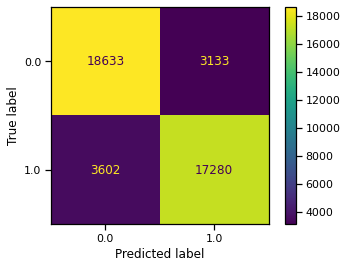

In [ ]:
plot_confusion_matrix(random_forest_clf_b, X_b, y_b)
plt.savefig('/content/drive/Shareddrives/MSc Ciencia Datos/proyectointegrador/Images/matConf_rndForest_balanced_random.png')
plt.show()

In [ ]:
print(classification_report(y_b, random_forest_clf_b.predict(X_b)))

              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85     21766
         1.0       0.85      0.83      0.84     20882

    accuracy                           0.84     42648
   macro avg       0.84      0.84      0.84     42648
weighted avg       0.84      0.84      0.84     42648



In [ ]:
cv_scores = metrics_CV_classifier(model = random_forest_clf_b, X = X_b, y = y_b, cv = 5)

F1 score medio en Train: 0.85
F1 score medio en Test: 0.73
Precision obtenido en train: 0.86
Precision obtenido en test: 0.73


,0,1,2,3,4
fit_time,12.937523,12.843906,12.826205,12.969653,9.176899
score_time,0.126841,0.126251,0.114648,0.117166,0.090034
estimator,"(DecisionTreeClassifier(max_depth=10, max_feat...","(DecisionTreeClassifier(max_depth=10, max_feat...","(DecisionTreeClassifier(max_depth=10, max_feat...","(DecisionTreeClassifier(max_depth=10, max_feat...","(DecisionTreeClassifier(max_depth=10, max_feat..."
test_accuracy,0.728957,0.736108,0.730832,0.73467,0.741119
train_accuracy,0.850402,0.851896,0.850577,0.850084,0.849468
test_f1,0.719349,0.728828,0.72237,0.725597,0.734168
train_f1,0.844646,0.846549,0.84574,0.844948,0.84408
test_precision,0.729444,0.733511,0.729783,0.734955,0.738257
train_precision,0.85924,0.859098,0.855106,0.855923,0.856351
test_recall,0.709531,0.724204,0.715107,0.716475,0.730125


## **Usando la curva ROC para comparar:**

- Árbol de decisiones

In [ ]:
tree_classifier = DecisionTreeClassifier(max_depth = 10, random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(
    X_b, y_b, test_size = 0.25, random_state = 0
)

tree_classifier.fit(X_train, y_train)
y_test_prob = tree_classifier.predict_proba(X_test)
y_test_pred = tree_classifier.predict(X_test)

 - Regresión Logística

In [ ]:
log_reg_clf = LogisticRegression(random_state=0)
log_reg_clf.fit(X_train, y_train)
y_test_log_reg_prob = log_reg_clf.predict_proba(X_test)
y_test_log_reg_pred = log_reg_clf.predict(X_test)

- Random Forest

In [ ]:
random_forest_clf_best = RandomForestClassifier(
    n_estimators = 50,
    max_depth = 10,
    random_state=0
)

random_forest_clf_best.fit(X_train, y_train)
y_test_rnd_prob = random_forest_clf_best.predict_proba(X_test)
y_test_rnd_pred = random_forest_clf_best.predict(X_test)

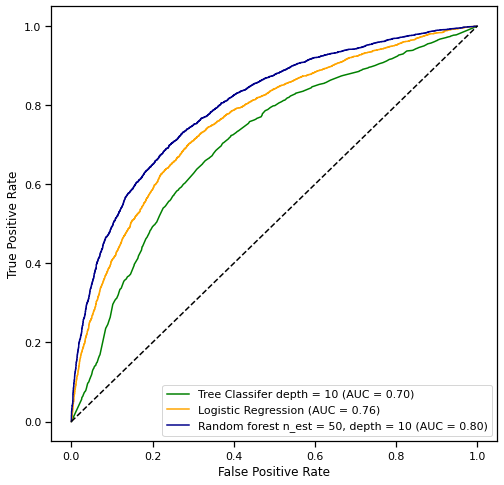

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:, 1])
roc_auc = auc(fpr, tpr)
display_roc = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='Tree Classifer depth = 10')

fpr_reg_log, tpr_reg_log, thresholds_reg_log = roc_curve(y_test, y_test_log_reg_prob[:, 1])
roc_auc_reg_log = auc(fpr_reg_log, tpr_reg_log)
display_reg_log = RocCurveDisplay(fpr=fpr_reg_log, tpr=tpr_reg_log, roc_auc=roc_auc_reg_log,
                                  estimator_name='Logistic Regression')

fpr_rnd_frst, tpr_rnd_frst, thresholds_rnd_frst = roc_curve(y_test, y_test_rnd_prob[:, 1])
roc_auc_rnd = auc(fpr_rnd_frst, tpr_rnd_frst)
display_reg_rnd = RocCurveDisplay(fpr=fpr_rnd_frst, tpr=tpr_rnd_frst, roc_auc=roc_auc_rnd,
                                  estimator_name='Random forest n_est = 50, depth = 10')

fig, ax = plt.subplots(figsize = (8, 8))
display_roc.plot(color = 'green', ax = ax)
display_reg_log.plot(color = 'orange', ax = ax)
display_reg_rnd.plot(color = 'darkblue', ax = ax)
plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10), linestyle = '--', color = 'black')
plt.savefig('/content/drive/Shareddrives/MSc Ciencia Datos/proyectointegrador/Images/ROCcurve_comparision.png')
plt.show()

## **Coeficiente de correlación de Mathews:**

In [ ]:
d_t_clf_mathew_coef = matthews_corrcoef(y_test, y_test_pred)
l_r_clf_mathew_coef = matthews_corrcoef(y_test, y_test_log_reg_pred)
r_f_clf_mathew_coef = matthews_corrcoef(y_test, y_test_rnd_pred)

print(
    f'Coeficiente de correlación de Mathews para el árbol de decisiones: {d_t_clf_mathew_coef:.4f}\n'
    f'Coeficiente de correlación de Mathews para la regresión logística: {l_r_clf_mathew_coef:.4f}\n'
    f'Coeficiente de correlación de Mathews para random forest: {r_f_clf_mathew_coef:.4f}'
)

Coeficiente de correlación de Mathews para el árbol de decisiones: 0.3279
Coeficiente de correlación de Mathews para la regresión logística: 0.4099
Coeficiente de correlación de Mathews para random forest: 0.4555


## **Preguntar:** ¿Vale la pena optimizar hiperparámetros dado los coeficientes de correlación de Mathews obtenidos? ¿Cómo sería el riesgo de overfitting?

## **Exporte del modelo:**

In [ ]:
filename = '/content/drive/Shareddrives/MSc Ciencia Datos/proyectointegrador/data lake/Logistic_Regression_clf.sav'
pickle.dump(log_reg_clf, open(filename, 'wb'))

upload_file_to_S3(
    file_name = filename,
    bucket = BUCKET_NAME,
    folder = 'SANDBOX'
)

True

In [ ]:
filename_tree = '/content/drive/Shareddrives/MSc Ciencia Datos/proyectointegrador/data lake/Decision_tree_clf.sav'
pickle.dump(log_reg_clf, open(filename_tree, 'wb'))

upload_file_to_S3(
    file_name = filename_tree,
    bucket = BUCKET_NAME,
    folder = 'SANDBOX'
)

True

In [ ]:
filename_pca = '/content/drive/Shareddrives/MSc Ciencia Datos/proyectointegrador/data lake/PCA_transformer.sav'
pickle.dump(pca_model, open(filename_pca, 'wb'))

upload_file_to_S3(
    file_name = filename_pca,
    bucket = BUCKET_NAME,
    folder = 'SANDBOX'
)

True

In [ ]:
filename_rnd = '/content/drive/Shareddrives/MSc Ciencia Datos/proyectointegrador/data lake/Random_Forest_clf.sav'
pickle.dump(random_forest_clf_best, open(filename_rnd, 'wb'))

upload_file_to_S3(
    file_name = filename_rnd,
    bucket = BUCKET_NAME,
    folder = 'SANDBOX'
)

True

Test:

In [ ]:
log_reg_loaded = pickle.load(open(filename, 'rb'))
log_reg_loaded.score(X_test, y_test)

0.7051209904333146

In [ ]:
log_reg_clf.score(X_test, y_test)

0.7051209904333146


## **Observaciones Retroalimentación:**    
- Detallar y expandir más la metodología. Desde la propuesta se debería haber aplicado
- Sugerencia: Para algunas partes del proyecto, usar Apache Spark. Mencionar la tecnología directamente, en el caso de colab (boto3).
- No meternos por catalogación (Glue, Athena...)
- Máx de faltantes un 20%
- Mirar la correlación con respecto a las variable de respuesta, coeficiente de Mathews, ANOVA's
- Impacto de la variable de respuesta sobre las variables cuantitivas
- Analizar variables que hacen parte del modelo socioeconómico
- Detección de atípicos, que generan perturbaciones en la modelación multivariante
- Modelo de clasificación: Se calibrar con el punto de corte de la función sigmoide de la regresión logística (ejemplo medicina). Para la muestra desbalanceada, se toman datos que equilibran la muestra (mín TARGET) muestreo aleatorio sin reempazo